A support vector machine (SVM) is defined as a machine learning algorithm that uses supervised learning models to solve complex.    

1- classification.      
2- Regression.     
3- outlier detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [10]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
130,7.4,2.8,6.1,1.9,2,virginica
37,4.9,3.6,1.4,0.1,0,setosa
77,6.7,3.0,5.0,1.7,1,versicolor
107,7.3,2.9,6.3,1.8,2,virginica
108,6.7,2.5,5.8,1.8,2,virginica


In [11]:
df['flower_name'].value_counts()

flower_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

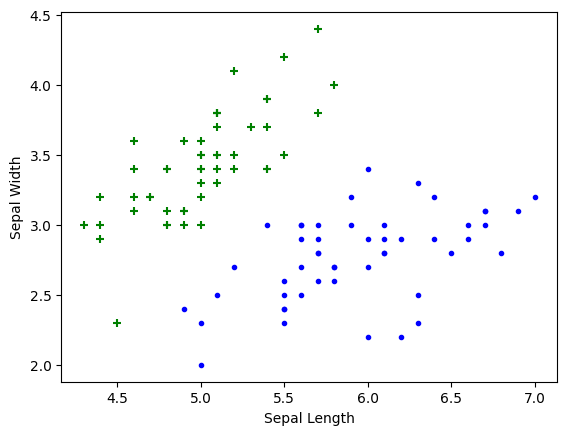

In [13]:
# Sepal length vs Sepal Width (Setosa vs Versicolor)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


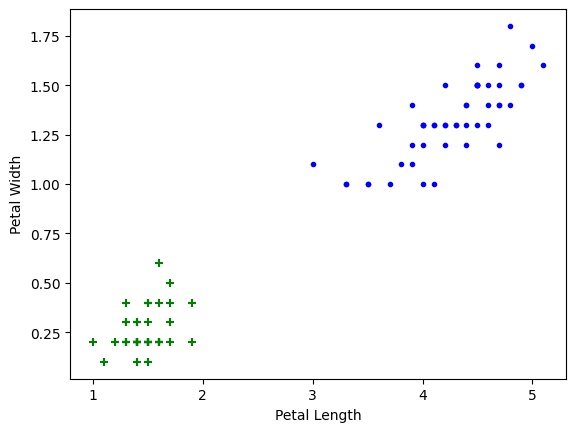

In [14]:
# Petal length vs Pepal Width (Setosa vs Versicolor)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

In [15]:
# Train Using Support Vector Machine (SVM)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
1,4.9,3.0,1.4,0.2
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0
10,5.4,3.7,1.5,0.2
...,...,...,...,...
62,6.0,2.2,4.0,1.0
42,4.4,3.2,1.3,0.2
40,5.0,3.5,1.3,0.3
91,6.1,3.0,4.6,1.4


In [19]:
len(X_train)

120

In [20]:
len(X_test)

30

In [21]:
from sklearn.svm import SVC
model = SVC()

In [22]:
model.fit(X_train, y_train)

SVC()

In [23]:
y_test

106    2
79     1
22     0
126    2
112    2
3      0
94     1
143    2
148    2
37     0
30     0
8      0
115    2
7      0
44     0
134    2
39     0
80     1
95     1
84     1
55     1
116    2
78     1
47     0
29     0
129    2
125    2
114    2
102    2
83     1
Name: target, dtype: int32

In [24]:
y_pred = model.predict(X_test)

In [25]:
y_pred

array([1, 1, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2,
       1, 0, 0, 2, 2, 2, 2, 2])

In [26]:
model.score(X_test, y_test)

0.9

In [36]:
model.predict([[5.1,3.5,1.4,0.2]])

c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [28]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  1]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      0.88      0.82         8
           2       0.91      0.83      0.87        12

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



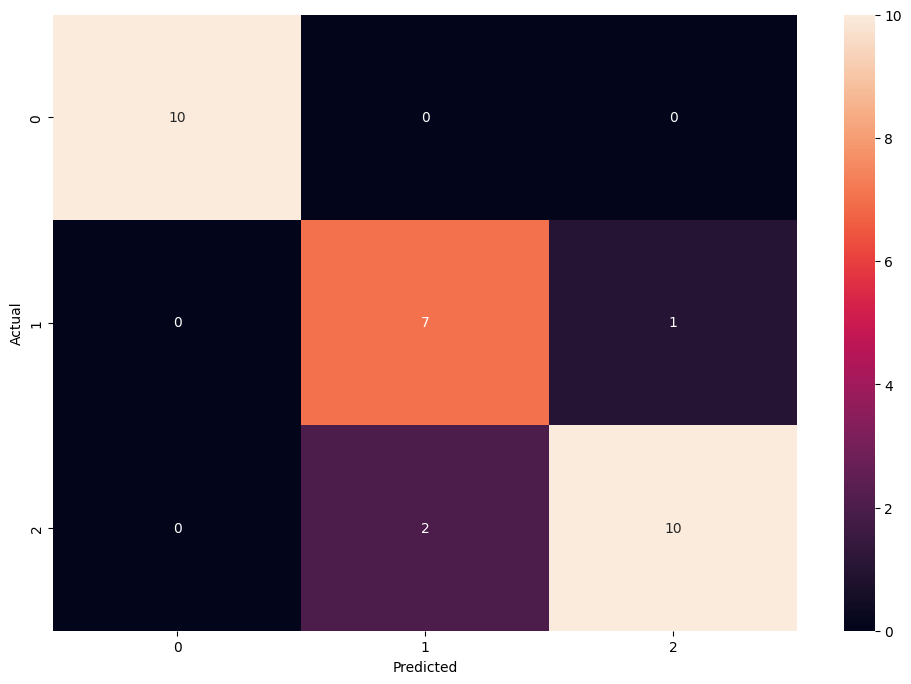

In [29]:
# draw the confusion matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Tune parameters

1. Regularization (C)


In [42]:
model_C = SVC(C=2)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

2. Gamma



In [43]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

3. Kernel

In [44]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [45]:
model_linear_kernal.score(X_test, y_test)

0.9666666666666667